<a href="https://colab.research.google.com/github/Bernardo-Senna/DataScience_Cryptocurrency_Project/blob/main/notebooks/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Projeto Final: Gun Violence
## Introdução
Neste trabalho vamos analisar informações históricas de preços de algumas das principais criptomoedas do mercado, por capitalização.

### Motivação
A motivação pelo trabalho veio de um interesse em comum entre os membros do grupo, à respeito da ascenção apresentada pelas Cripto Moedas. 
Para entender melhor as influências criadas por elas no mercado financeiro, e também os diversos impactos causados por elas, escolhemos uma base de dados que apresenta os dados históricos de 23 das principais cripto moedas existentes.

### Dados Utilizados
Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público (Kaggle). Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
import scipy as sci
import scipy.stats as st
import seaborn as sb
import statsmodels.api as sm
import os
import pandas
import sklearn

#o comando abaixo faz com que o Pandas identifique dados que tendem ao infinito (inf ou -inf), tratando-os como NaN
pandas.options.mode.use_inf_as_na = True
coinsDict = {}

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
coinsDict = {
    'aave':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Aave.csv"),
    'binanceCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_BinanceCoin.csv"),
    'bitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Bitcoin.csv"),
    'cardano':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cardano.csv"),
    'chainLink':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_ChainLink.csv"),
    'cosmos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cosmos.csv"),
    'cryptocomCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_CryptocomCoin.csv"),
    'dogecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Dogecoin.csv"),
    'eos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_EOS.csv"),
    'ethereum':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Ethereum.csv"),
    'lota':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Iota.csv"),
    'litecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Litecoin.csv"),
    'monero':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Monero.csv"),
    'nem':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_NEM.csv"),
    'polkadot':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Polkadot.csv"),
    'solana':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Solana.csv"),
    'stellar':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Stellar.csv"),
    'tether':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tether.csv"),
    'tron':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tron.csv"),
    'usdCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_USDCoin.csv"),
    'uniswap':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Uniswap.csv"),
    'wrappedBitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_WrappedBitcoin.csv"),
    'xrp':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_XRP.csv"),
}

In [ ]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
        elif isinstance(data, pd.Series):
            converted = data.to_frame().T
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted


In [ ]:
for coin in coinsDict:
  coinsDict[coin]['Year'] = coinsDict[coin]['Date'].map(lambda x: x[0:4])
  coinsDict[coin]['Month'] = coinsDict[coin]['Date'].map(lambda x: x[5:7])
  coinsDict[coin]['Day'] = coinsDict[coin]['Date'].map(lambda x: x[8:10])
  coinsDict[coin]['Difference'] = coinsDict[coin]['Close'] - coinsDict[coin]['Open']

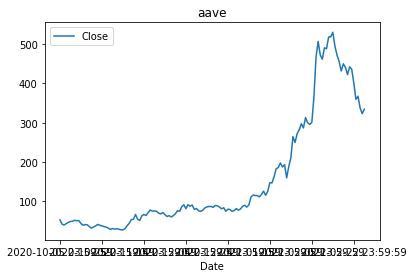

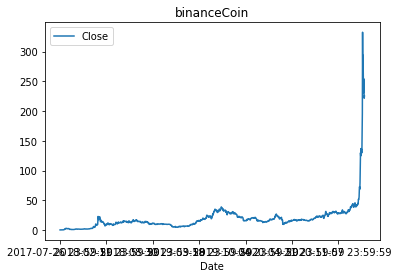

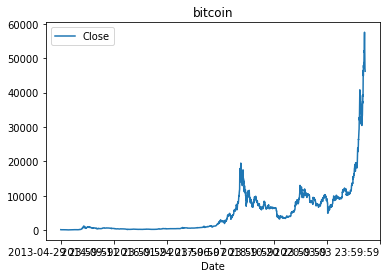

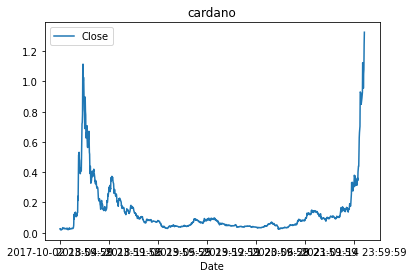

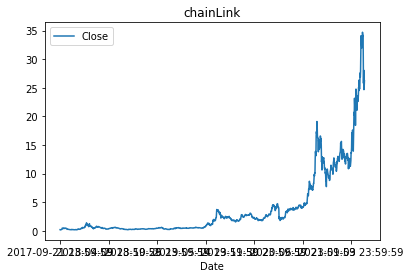

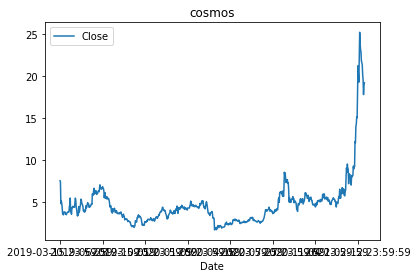

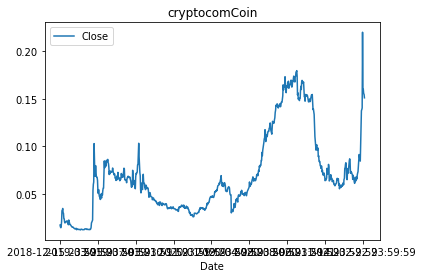

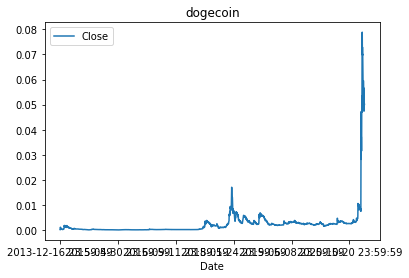

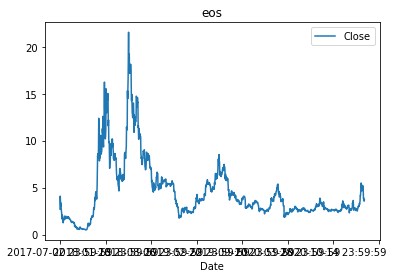

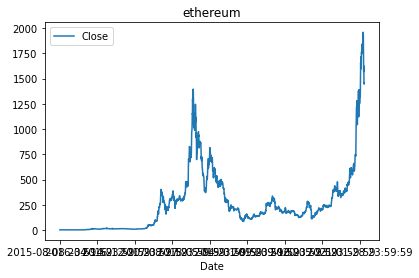

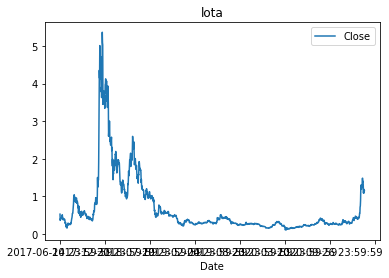

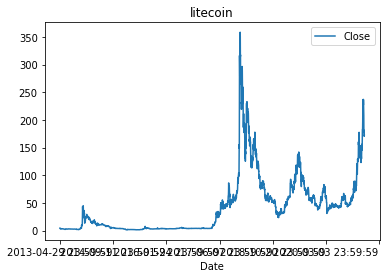

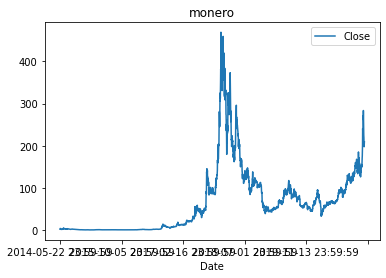

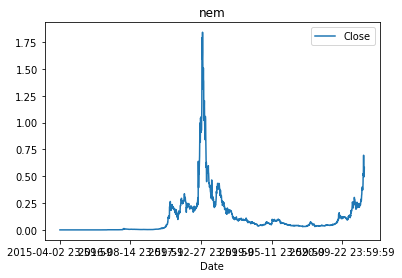

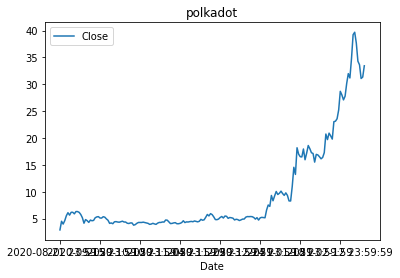

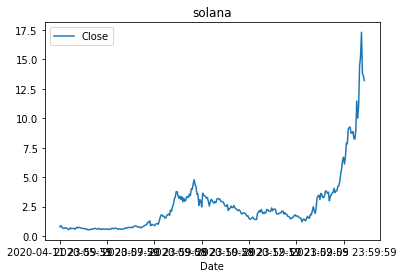

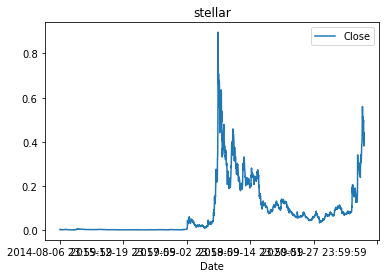

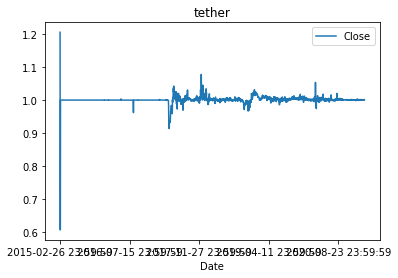

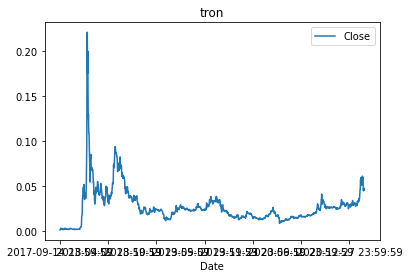

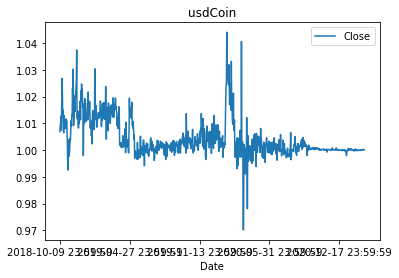

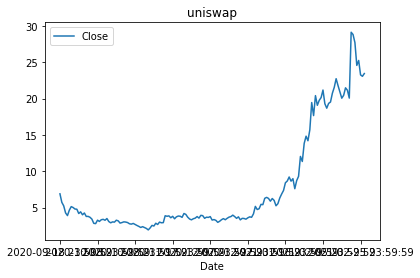

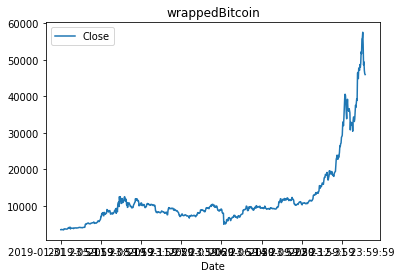

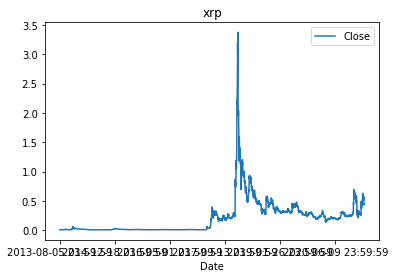

In [ ]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin.plot("Date","Close", ax=ax)
  plt.title(name)
  plt.show()

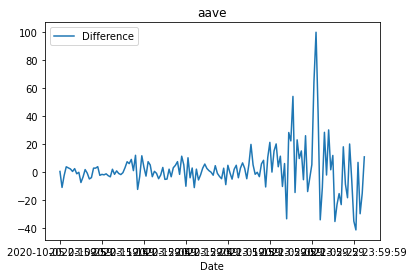

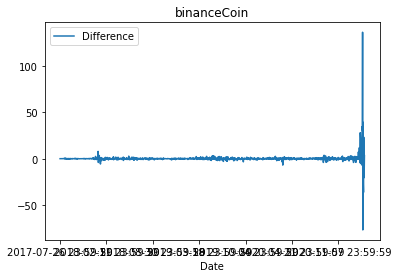

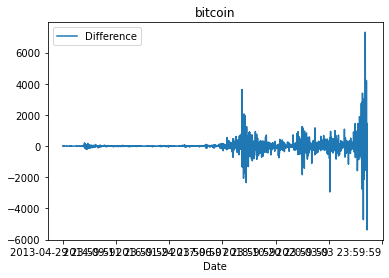

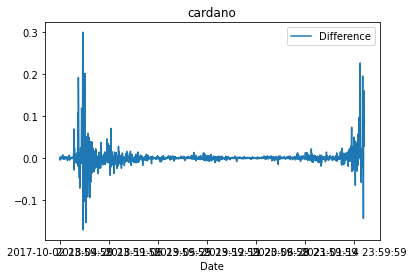

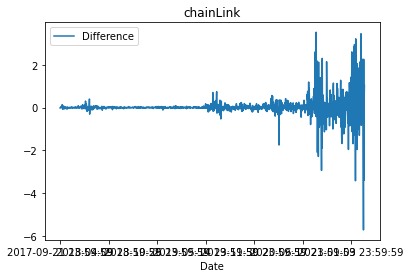

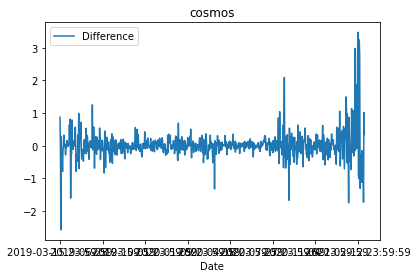

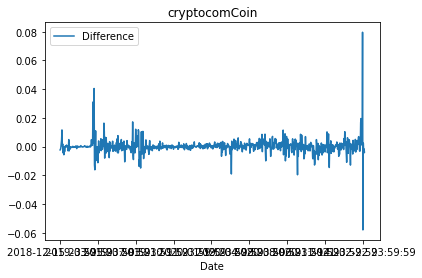

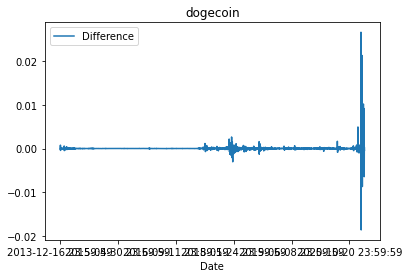

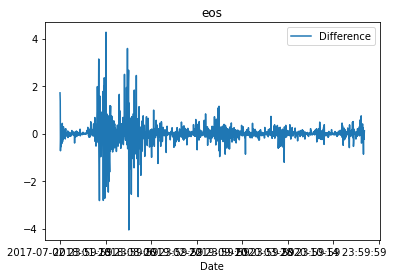

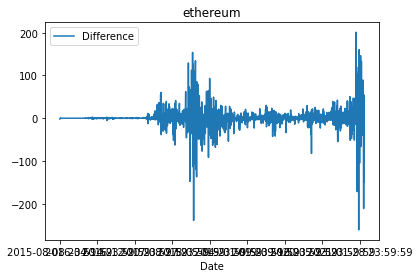

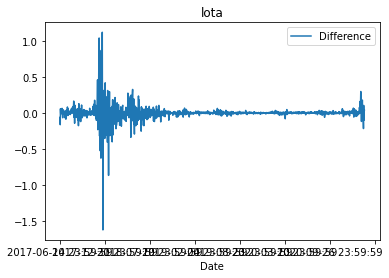

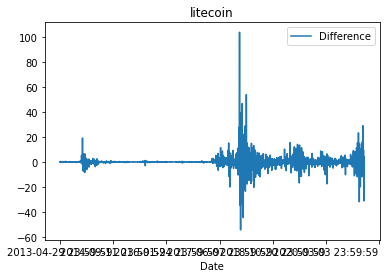

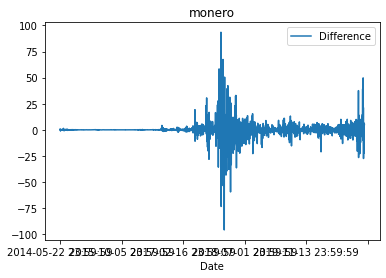

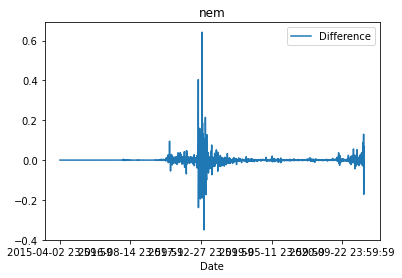

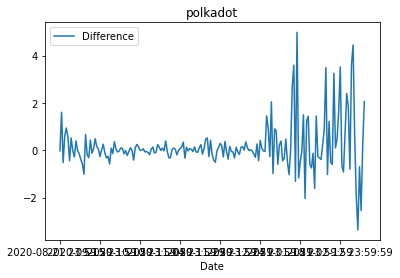

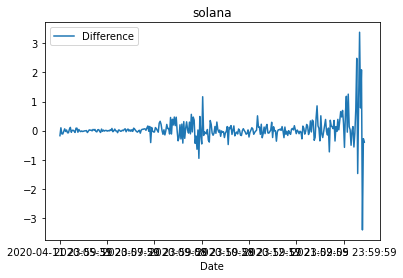

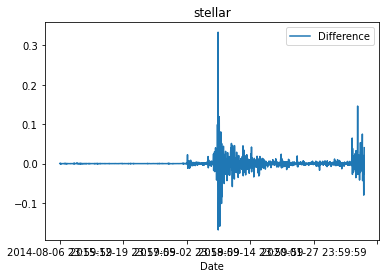

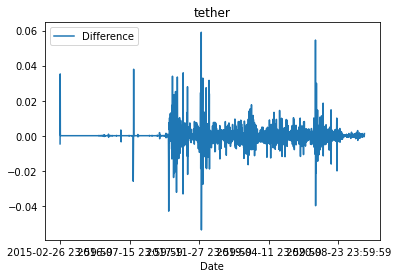

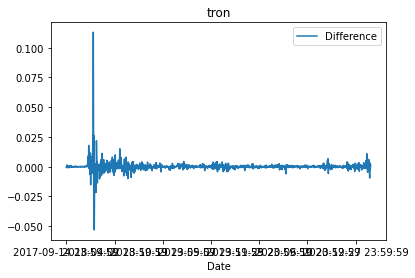

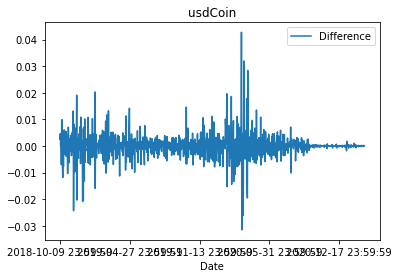

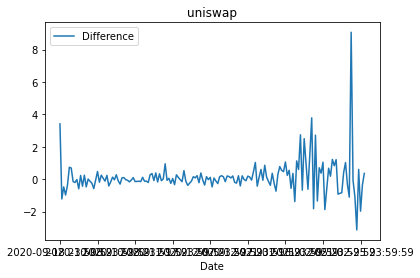

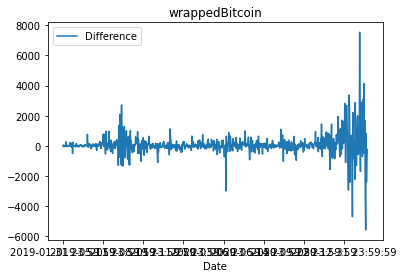

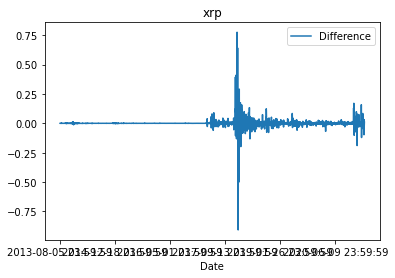

In [ ]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin.plot("Date","Difference", ax=ax)
  plt.title(name)
  plt.show()

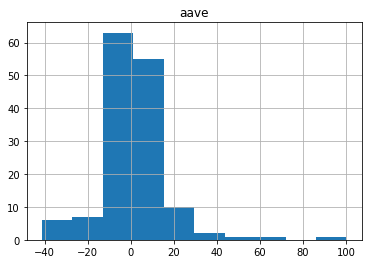

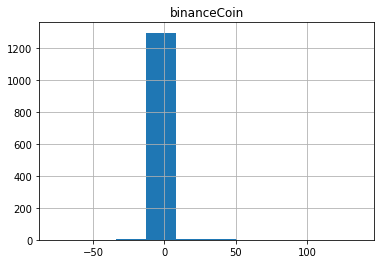

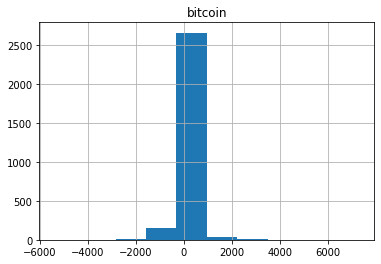

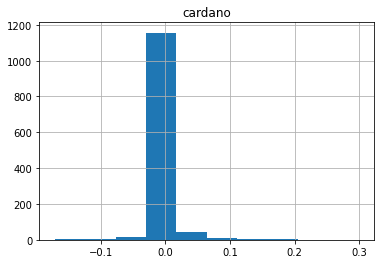

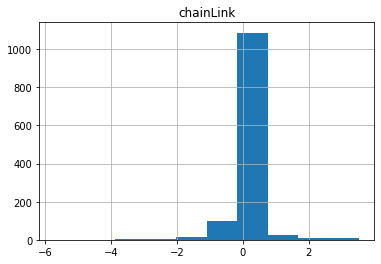

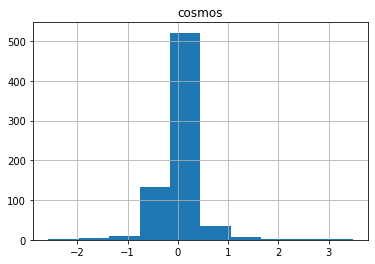

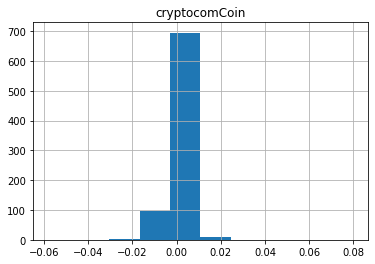

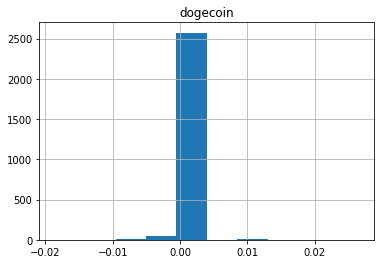

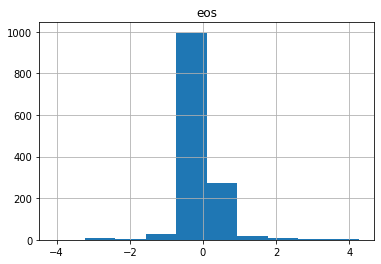

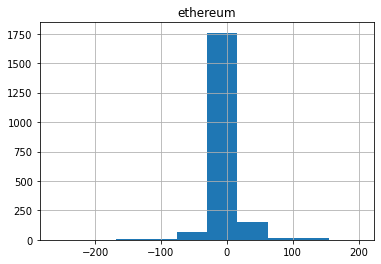

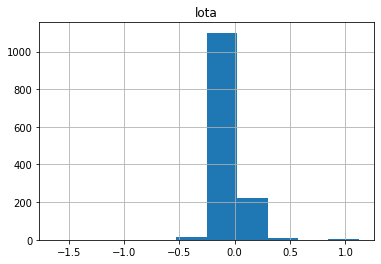

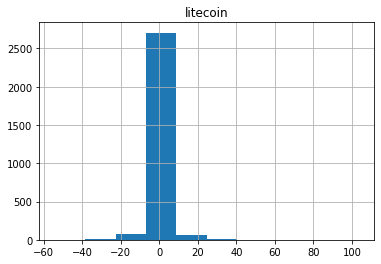

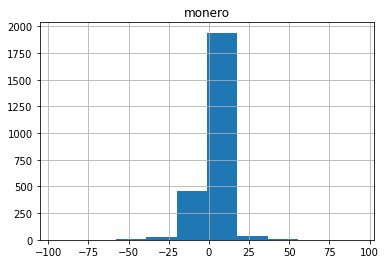

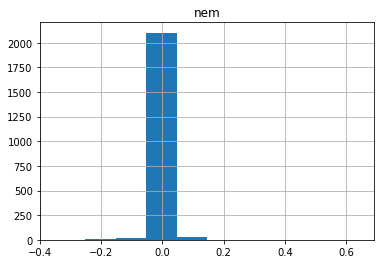

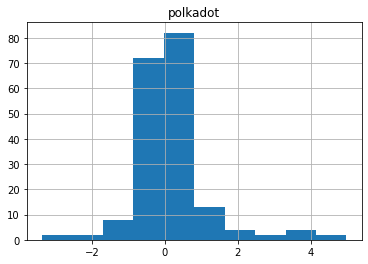

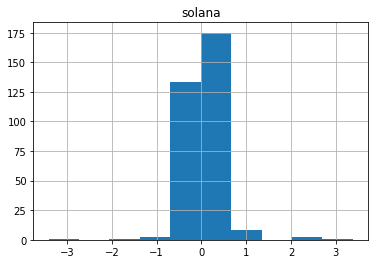

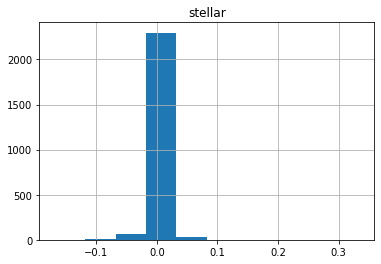

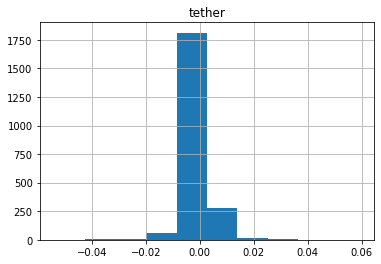

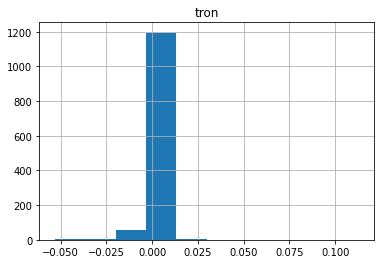

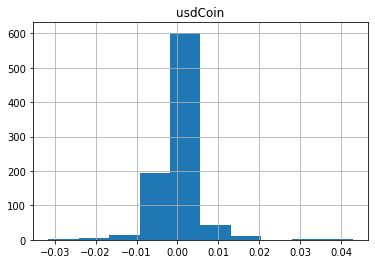

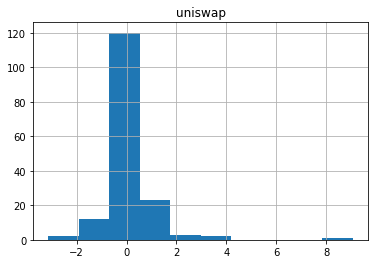

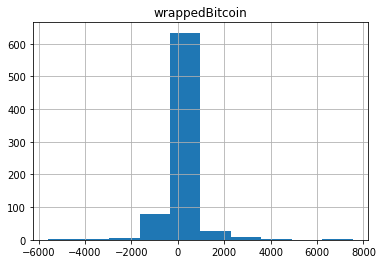

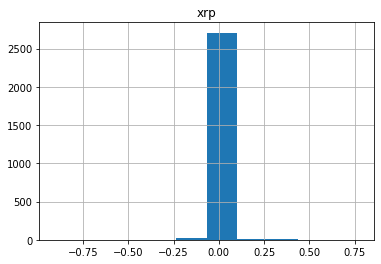

In [ ]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin.hist("Difference", ax=ax)
  plt.title(name)
  plt.show()

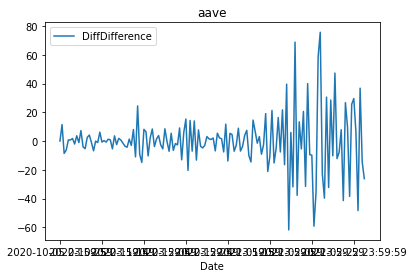

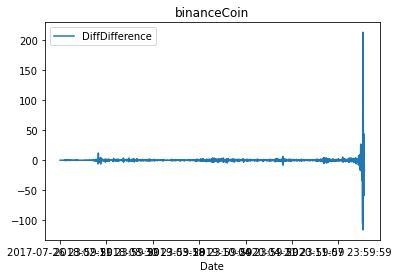

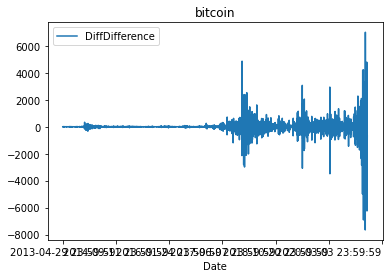

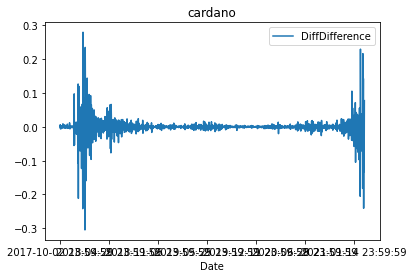

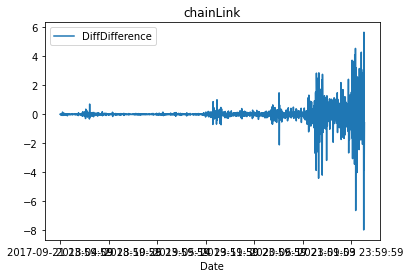

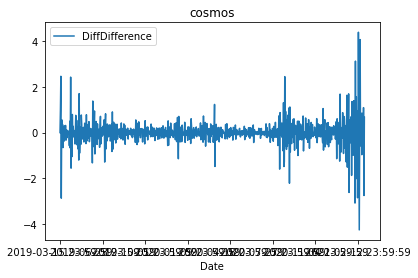

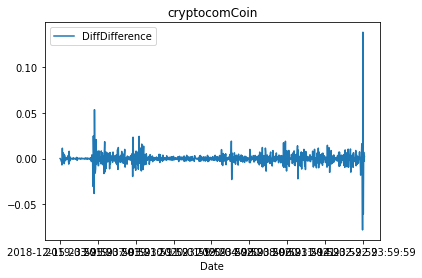

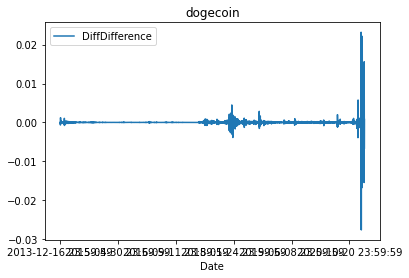

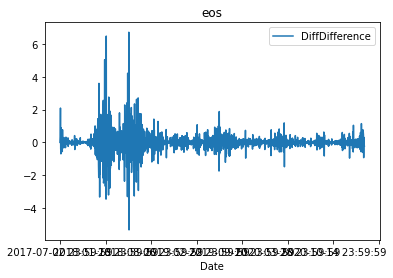

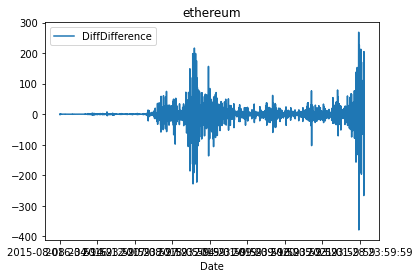

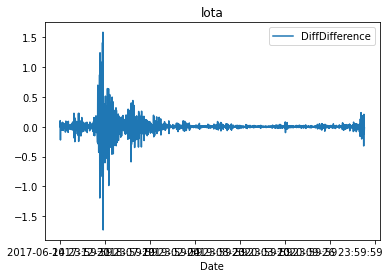

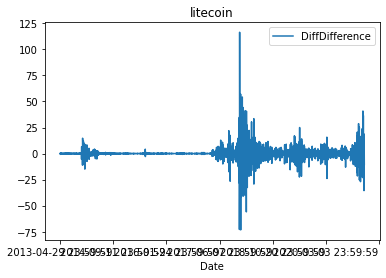

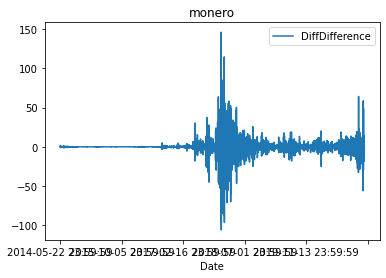

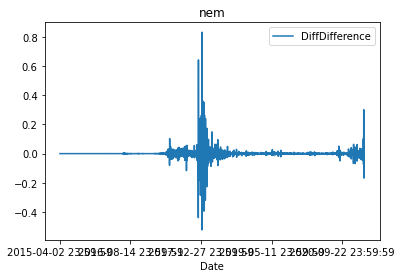

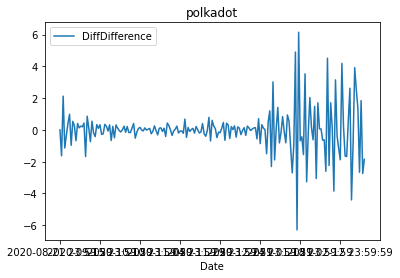

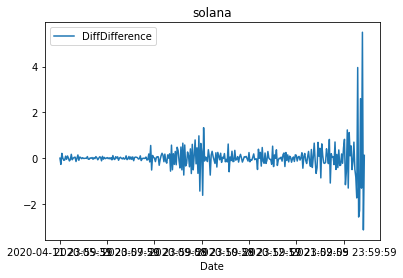

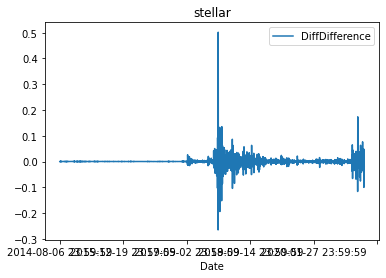

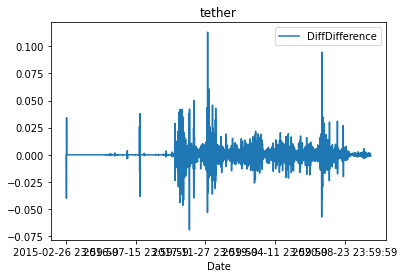

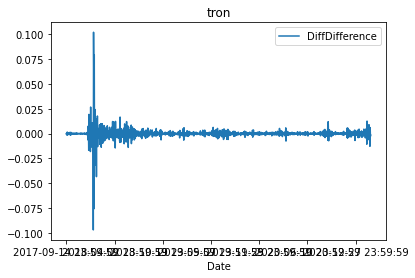

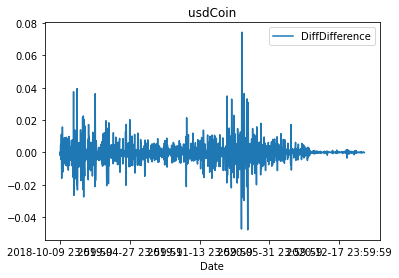

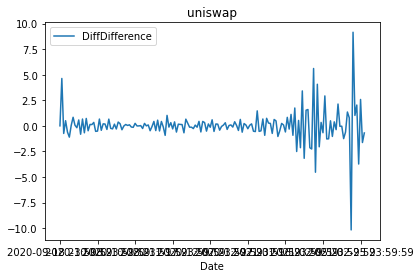

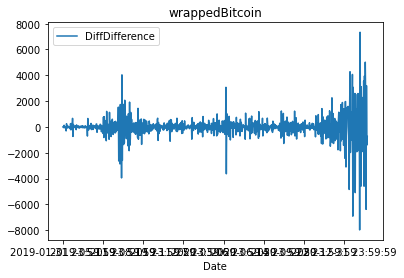

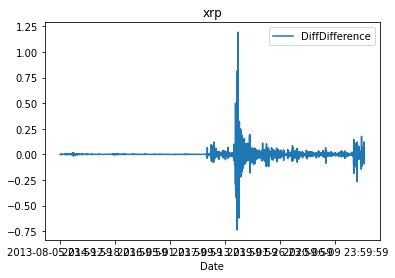

In [ ]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin["DiffDifference"] = np.concatenate((np.zeros(1), coin["Difference"].iloc[:-1].values - coin["Difference"].iloc[1:].values))
  coin.plot("Date","DiffDifference", ax=ax)
  plt.title(name)
  
  plt.show()

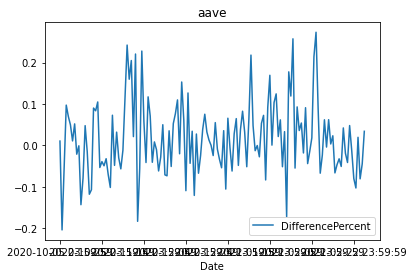

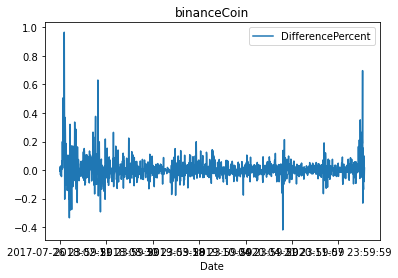

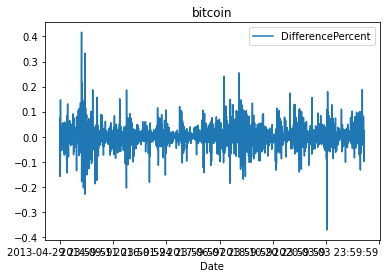

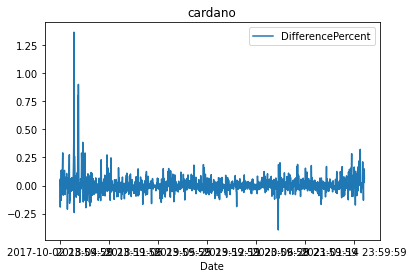

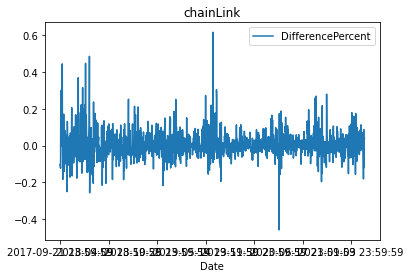

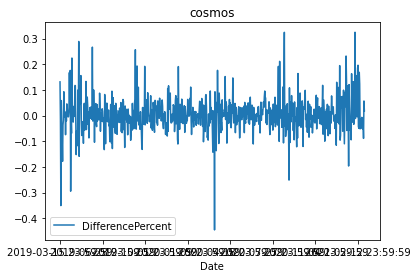

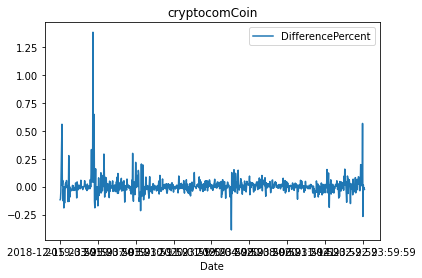

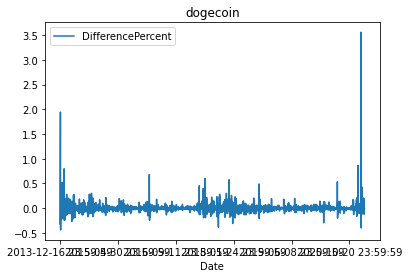

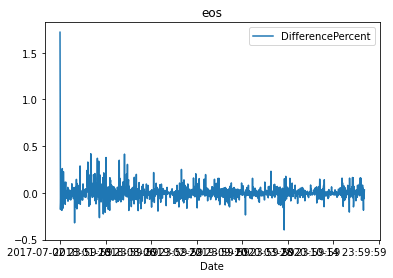

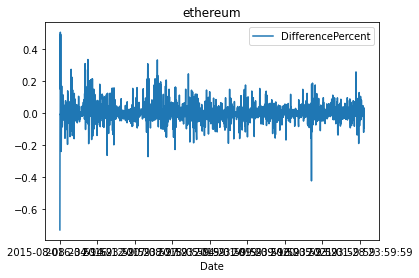

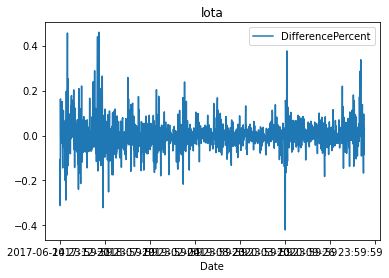

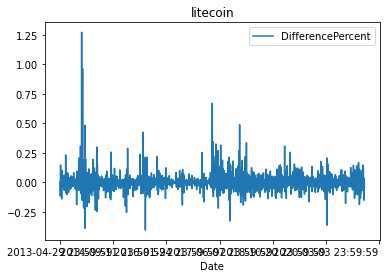

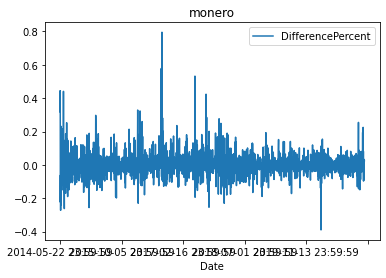

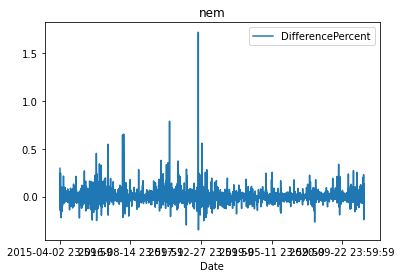

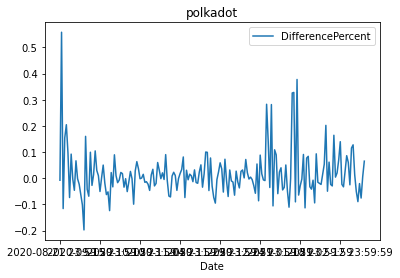

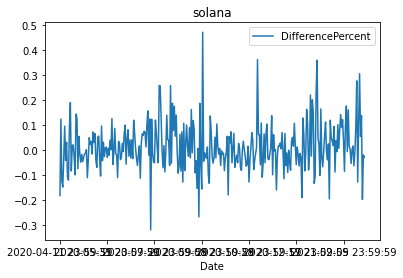

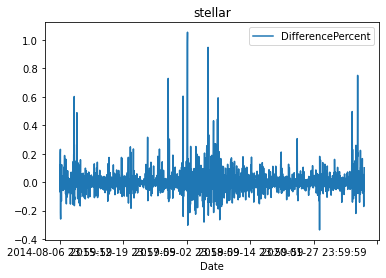

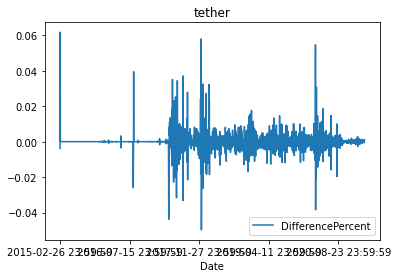

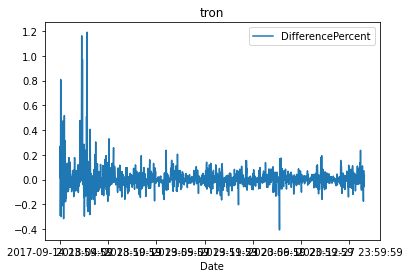

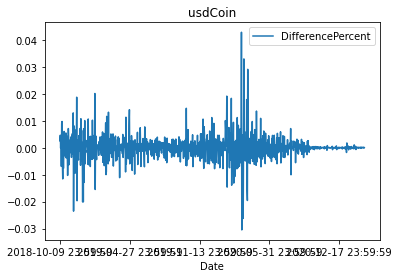

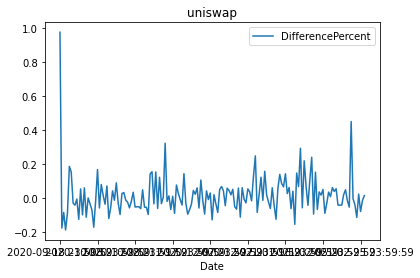

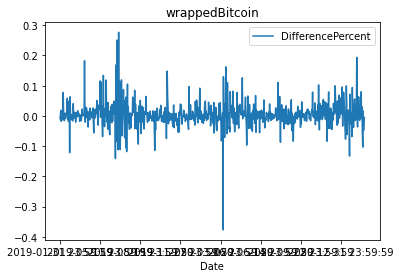

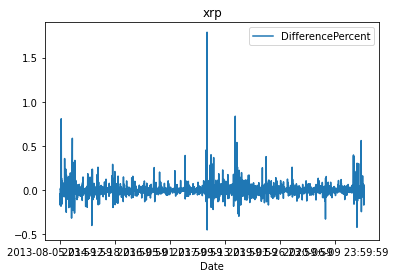

In [ ]:
for name, coin in coinsDict.items():
  fig = plt.figure()
  ax = fig.add_subplot()
  coin["DifferencePercent"] = coin["Difference"] / coin["Open"]
  coin.plot("Date","DifferencePercent", ax=ax)
  plt.title(name)
  
  plt.show()

In [ ]:
from statsmodels import tsa

In [ ]:
result = tsa.api.kpss(coinsDict["bitcoin"]["DiffDifference"])
print(result[1])

0.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


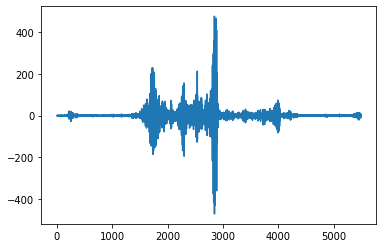

In [ ]:
plt.plot(sci.signal.correlate(coinsDict["bitcoin"]["DiffDifference"], coinsDict["dogecoin"]["DiffDifference"]))

$X_i = X_{i-1} + \delta_i$; $\delta_i = \delta_{i-1} + \Delta_i$

In [ ]:
coinsDict['bitcoin']['Difference'].var()

167320.49522623324

In [ ]:
#variancia da variação

coinsDict['bitcoin']['Difference'].std()

409.04827982309524

In [ ]:
coinsDict['bitcoin'].head()

SNo     Name Symbol  ... Difference  DiffDifference  DifferencePercent
0    1  Bitcoin    BTC  ...  10.095993        0.000000           0.075094
1    2  Bitcoin    BTC  ...  -5.000000       15.095993          -0.034722
2    3  Bitcoin    BTC  ... -22.010002       17.010002          -0.158345
3    4  Bitcoin    BTC  ... -11.169998      -10.840004          -0.095979
4    5  Bitcoin    BTC  ...  -8.500000       -2.669998          -0.080000

[5 rows x 16 columns]

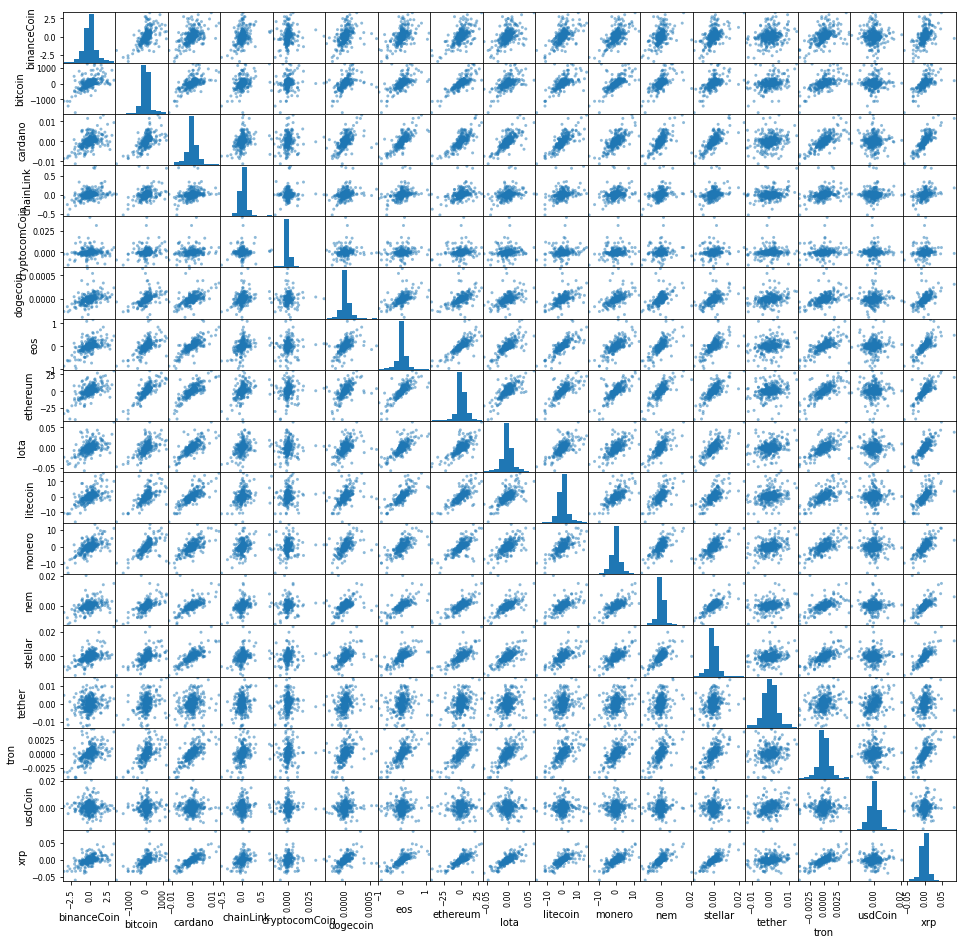

In [ ]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]
var = {name: coin[coin["Date"].isin(dates)]["Difference"].to_numpy() for name, coin in coinsDict.items()}
var = {name:coin for name,coin in var.items() if len(coin) == 365}
var = pd.DataFrame(var)
pd.plotting.scatter_matrix(var, figsize=(16,16))
print(" ")

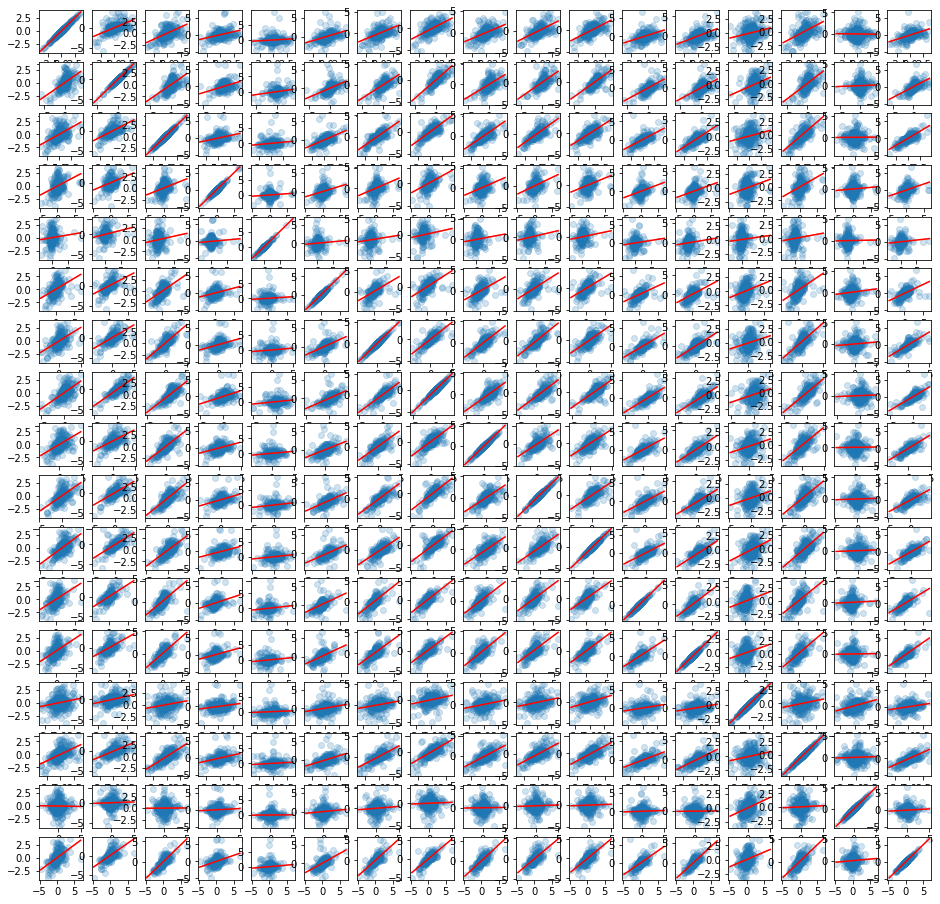

In [ ]:
import scipy.stats

fig = plt.figure(figsize=(16,16))
regression_results = {}
for i, name1 in enumerate(var.columns):
  regression_results[name1] = {}
  for j, name2 in enumerate(var.columns):
    array1 = var[name1]
    array2 = var[name2]
    array1 = (array1-array1.mean())/array1.std()
    array2 = (array2-array2.mean())/array2.std()
    result = scipy.stats.linregress(array1,array2)
    ax = fig.add_subplot(len(var.columns), len(var.columns), (i*len(var.columns))+j+1)
    ax.scatter(array1,array2, alpha=0.2)
    linrange = np.linspace(min(array1), max(array1), 365)
    y_hat = linrange*result.slope +result.intercept
    ci = 1.96 * result.stderr
    ax.plot(linrange, y_hat, color='red')#, label=f"p={result.pvalue}\nR²={result.rvalue **2}\nci={ci}")
    ax.fill_between(linrange, y_hat-ci, y_hat+ci, alpha=0.8)
    # ax.xlabel(name1)
    # ax.ylabel(name2)
    # ax.legend()
    regression_results[name1][name2] = result

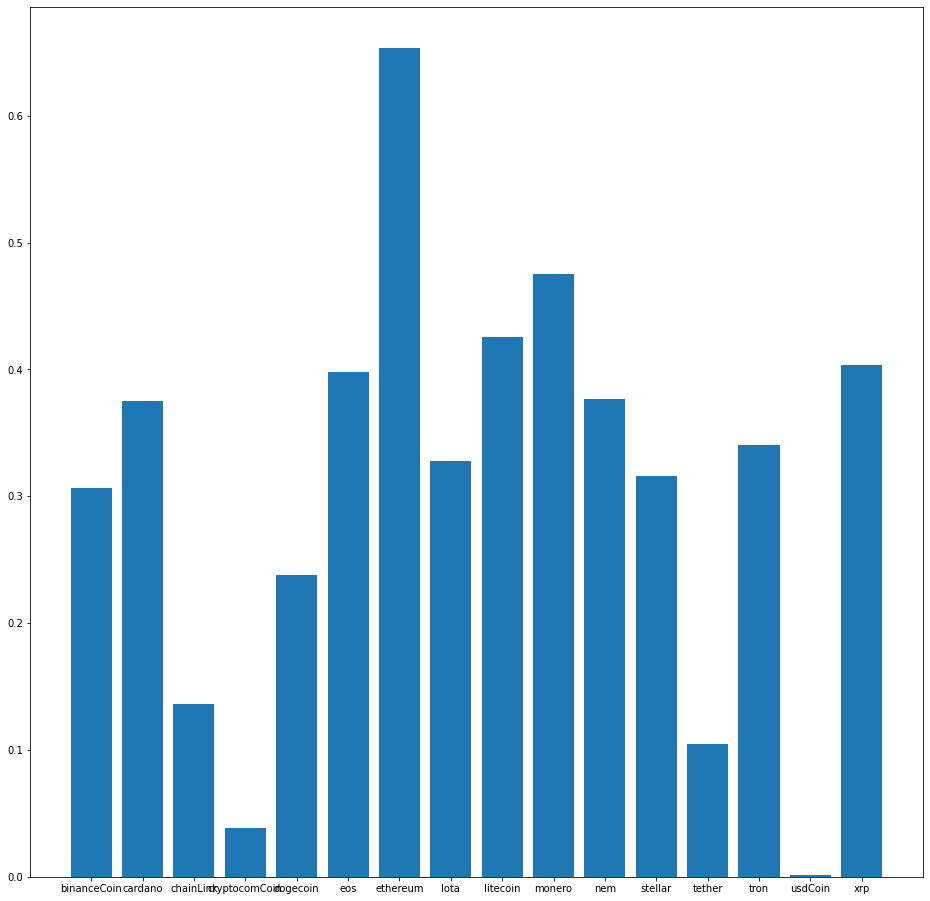

In [ ]:

name, rvalue = zip(*[(name, r.rvalue ** 2) for name, r in regression_results['bitcoin'].items() if name != 'bitcoin'])
plt.figure(figsize=(16,16))
plt.bar(range(len(rvalue)), rvalue)
plt.xticks(range(len(rvalue)), name)
plt.show()

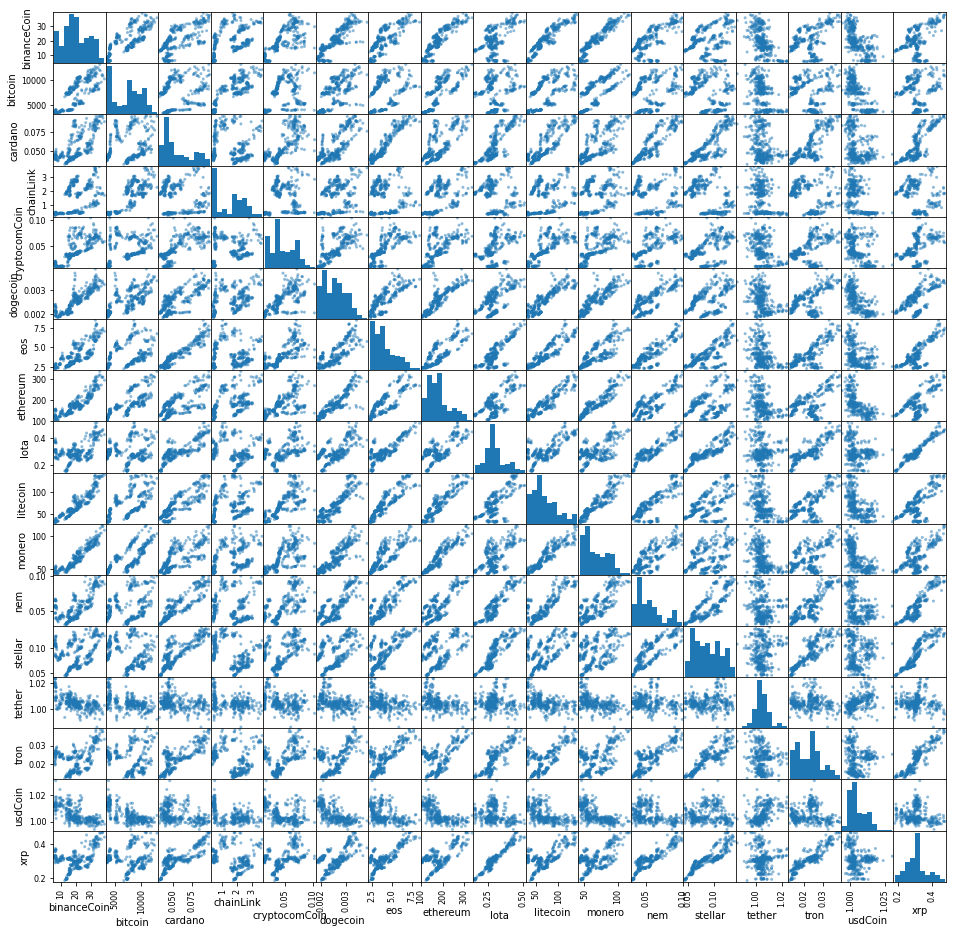

In [ ]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]
closes = {name: coin[coin["Date"].isin(dates)]["Close"].to_numpy() for name, coin in coinsDict.items()}
closes = {name:coin for name,coin in closes.items() if len(coin) == 365}
closes = pd.DataFrame(closes)
pd.plotting.scatter_matrix(closes, figsize=(16,16))
print(" ")

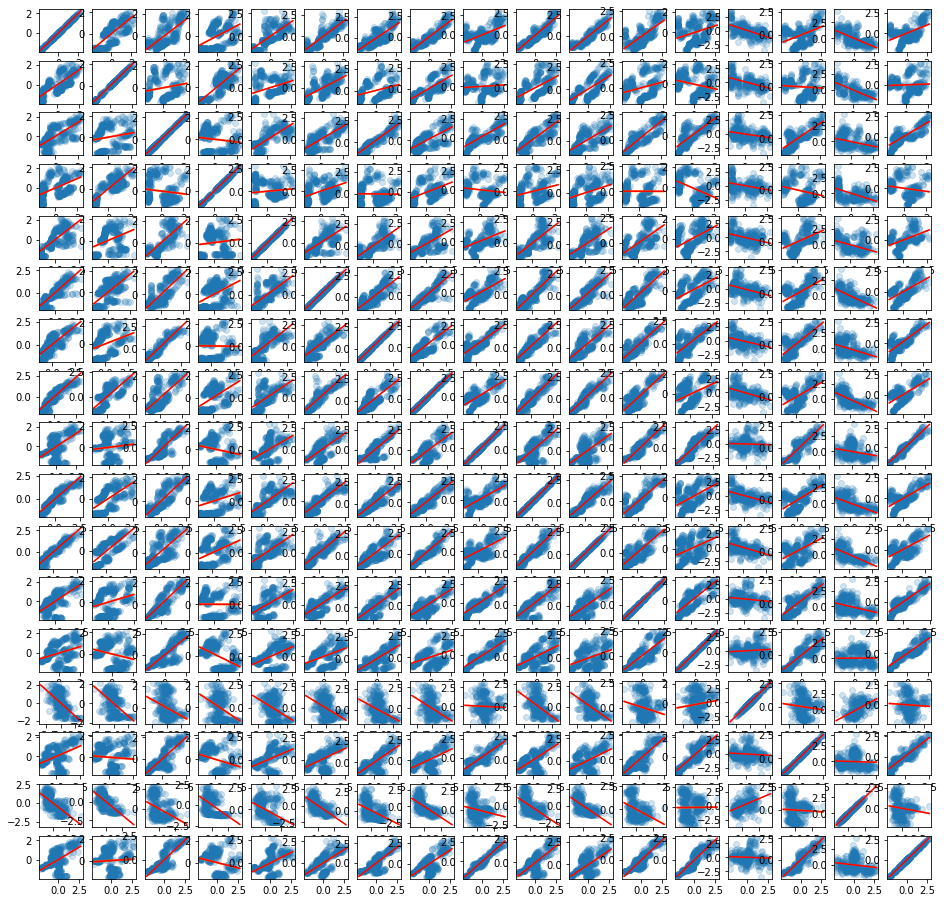

In [ ]:
import scipy.stats

fig = plt.figure(figsize=(16,16))
regression_results = {}
for i, name1 in enumerate(closes.columns):
  regression_results[name1] = {}
  for j, name2 in enumerate(closes.columns):
    array1 = closes[name1]
    array2 = closes[name2]
    array1 = (array1-array1.mean())/array1.std()
    array2 = (array2-array2.mean())/array2.std()
    result = scipy.stats.linregress(array1,array2)
    ax = fig.add_subplot(len(var.columns), len(var.columns), (i*len(var.columns))+j+1)
    ax.scatter(array1,array2, alpha=0.2)
    linrange = np.linspace(min(array1), max(array1), 365)
    y_hat = linrange*result.slope +result.intercept
    ci = 1.96 * result.stderr
    ax.plot(linrange, y_hat, color='red')#, label=f"p={result.pvalue}\nR²={result.rvalue **2}\nci={ci}")
    ax.fill_between(linrange, y_hat-ci, y_hat+ci, alpha=0.8)
    # ax.xlabel(name1)
    # ax.ylabel(name2)
    # ax.legend()
    # regression_results[name1][name2] = result

In [ ]:

name, rvalue = zip(*[(name, r.rvalue ** 2) for name, r in regression_results['bitcoin'].items() if name != 'bitcoin'])
plt.figure(figsize=(16,16))
plt.bar(range(len(rvalue)), rvalue)
plt.xticks(range(len(rvalue)), name)
plt.show()

ValueError: ignored

In [ ]:
matrix = np.zeros((len(regression_results),len(regression_results)))
for i, (key, value) in enumerate(regression_results.items()):
  for j, (name, res) in enumerate(value.items()):
    matrix[i,j] = res.rvalue**2
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot()
ax.imshow(matrix, cmap='hot', aspect='auto')
plt.yticks(range(len(regression_results)), list(regression_results.keys()))
plt.xticks(range(len(regression_results)), list(regression_results.keys()), rotation=90)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
coinsDict['bitcoin'].plot.scatter("Open", "Difference", ax=ax)
data = coinsDict['bitcoin'].loc[:, ("Open", "Difference")].to_numpy()
result = scipy.stats.linregress(data)
print(result)
linspace = np.linspace(np.min(data[0]), np.max(data[1]))
ax.plot(linspace, linspace *result.slope + result.intercept)
plt.show()

In [ ]:
scipy.stats.shapiro(coinsDict['bitcoin']['Difference'])

In [ ]:
rs = []
for name, coin in coinsDict.items():
  plt.figure()
  x = coin['Difference'][:-1]
  y = coin['Difference'][1:]
  x = (x-x.mean())/x.std()
  y = (y-y.mean())/y.std()
  plt.scatter(x,y,alpha=0.2)
  result = scipy.stats.linregress(x,y)
  rs.append(result.rvalue)
  linspace = np.linspace(min(x), max(x))
  plt.plot(linspace, linspace*result.slope, color='red', label=f"R²={result.rvalue **2}")
  plt.legend()
  plt.title(name)
  plt.show()
  plt.close()

In [ ]:
coinsDict['bitcoin'].scatter()

In [ ]:
# coinsDict["bitcoin"].hist("Difference", bins=100)
import seaborn as sns
import scipy.stats
for name in coinsDict.keys():
  _, pvalue = scipy.stats.shapiro(coinsDict[name]["Close"] - coinsDict[name]["Open"])
  print(name, pvalue)
  print(len(coinsDict[name]))

In [ ]:
name = coinsDict.keys()
plt.figure(figsize=(16,16))
plt.bar(range(len(rs)), rs)
plt.xticks(range(len(rs)), name)

In [ ]:
subdf = coinsDict['bitcoin'][['Difference', 'Year', 'Month']].groupby(['Year', 'Month']).sum()

In [ ]:
subdf
# plt.hist(subdf['Difference'])

In [ ]:
#dados Z-normalizdos por dia
Zcoindict = coinsDict

for coin in Zcoindict:
    Zcoindict[coin]['High'] = (Zcoindict[coin]['High'] - Zcoindict[coin]['High'].mean())/Zcoindict[coin]['High'].std()
    Zcoindict[coin]['Low'] = (Zcoindict[coin]['Low'] - Zcoindict[coin]['Low'].mean())/Zcoindict[coin]['Low'].std()
    Zcoindict[coin]['Open'] = (Zcoindict[coin]['Open'] - Zcoindict[coin]['Open'].mean())/Zcoindict[coin]['Open'].std()
    Zcoindict[coin]['Close'] = (Zcoindict[coin]['Close'] - Zcoindict[coin]['Close'].mean())/ Zcoindict[coin]['Close'].std()
    # Zcoindict[coin]['Variation'] = (Zcoindict[coin]['Variation'] - Zcoindict[coin]['Variation'].mean())/Zcoindict[coin]['Variation'].std()

Zcoindict['bitcoin'].tail()



In [ ]:
#A data de criação da moeda diz algo a respeito do seu Marketcap atual ?

from datetime import datetime

df_allCoins = pd.DataFrame()

for coins in coinsDict:
  df_aux = convert(coinsDict[coins].iloc[[0, -1]], 'dataframe')
  df_allCoins = pd.concat([df_allCoins, df_aux], ignore_index=True)

df_coin_per_existence_time = pd.DataFrame(columns=['Name', 'Existence_time (days)', 'Last_Marketcap'])

for coinName in np.unique(df_allCoins["Name"]):
  init_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[0]
  init_time = datetime.fromisoformat(init_time)

  end_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[1]
  end_time = datetime.fromisoformat(end_time)

  existence_time = (pd.Timedelta(end_time - init_time).days)

  last_mktcap = df_allCoins[df_allCoins["Name"] == coinName]["Marketcap"].iloc[1]

  series_aux = pd.Series([coinName, existence_time, last_mktcap], index=df_coin_per_existence_time.columns)
  df_coin_per_existence_time = pd.concat([df_coin_per_existence_time, convert(series_aux, 'dataframe')], ignore_index=True)

df_coin_per_existence_time = df_coin_per_existence_time.sort_values(by=['Existence_time (days)', 'Last_Marketcap']).reset_index()
df_coin_per_existence_time
